## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze5.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805
...,...,...,...,...,...,...
845,30,0,1,1,33.0,72.282306
846,4,1,1,0,29.0,31.734540
847,50,0,1,0,29.0,134.725193
848,29,0,0,0,41.0,75.382218


In [196]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


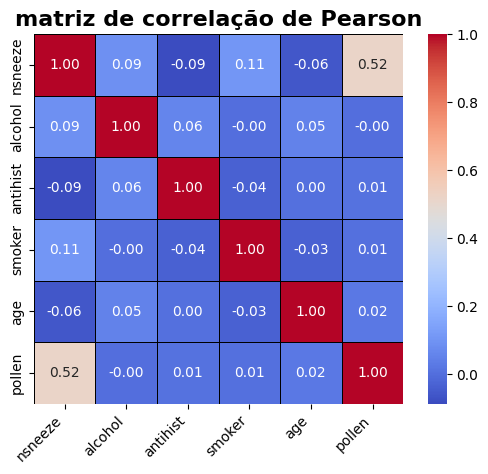

In [197]:
pearson = df.corr() 

sns.heatmap(pearson,annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='black', annot_kws={"size": 10})
plt.title('matriz de correlação de Pearson', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

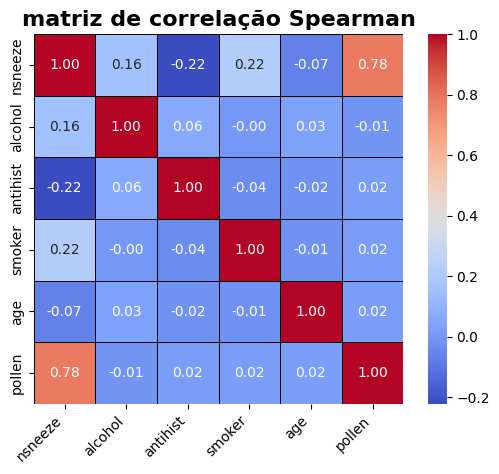

In [198]:
spearman = df.corr(method='spearman')
sns.heatmap(spearman,annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='black', annot_kws={"size": 10})
plt.title('matriz de correlação Spearman', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

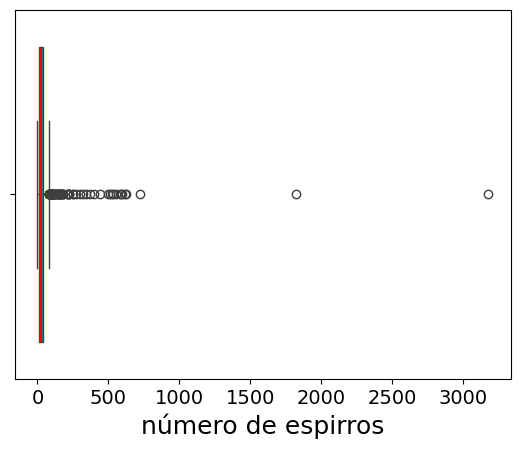

In [199]:

   
sns.boxplot(x=df['nsneeze'], medianprops=dict(color="red", linewidth=2))
plt.xlabel('número de espirros', fontsize=18)
#plt.ylabel(item, fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title(f'Schooling in {item}', fontsize=20)
plt.show()
#nota-se que há 3 outliers bem claros, então, para melhor visualização dos dados, 
#eles serão removidos apenas dos gráficos.

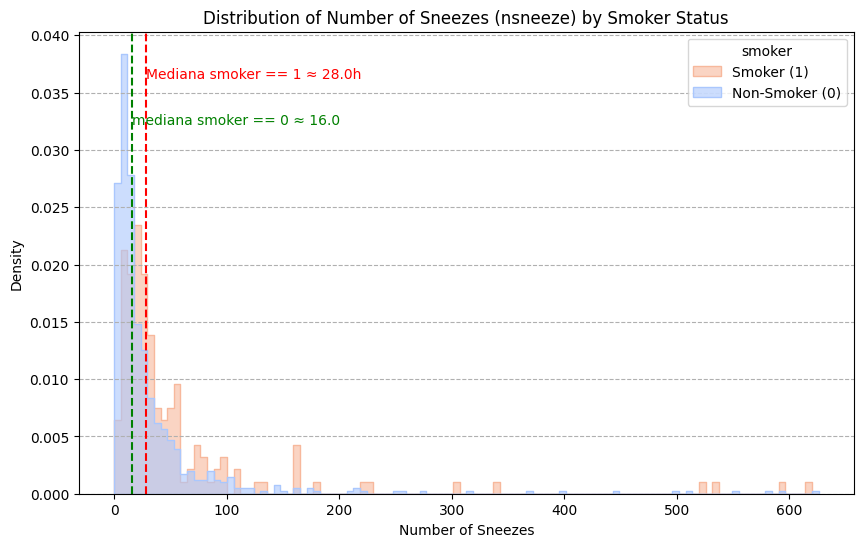

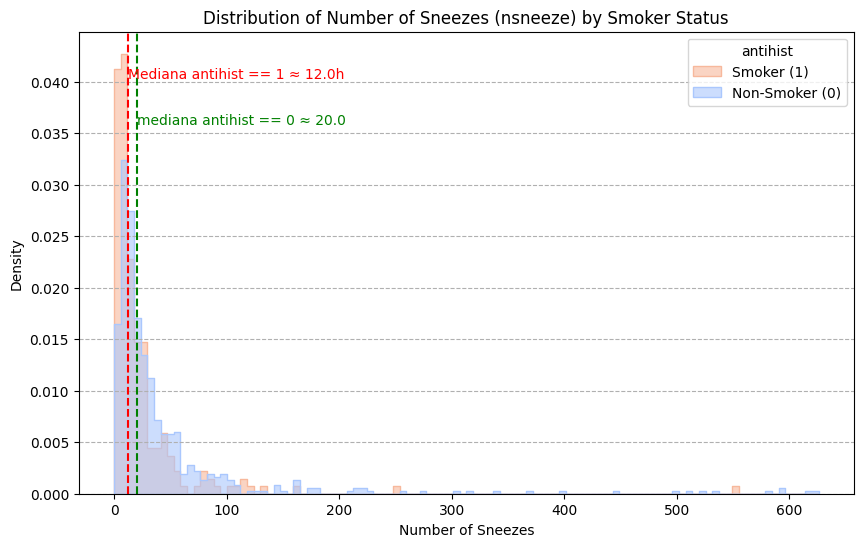

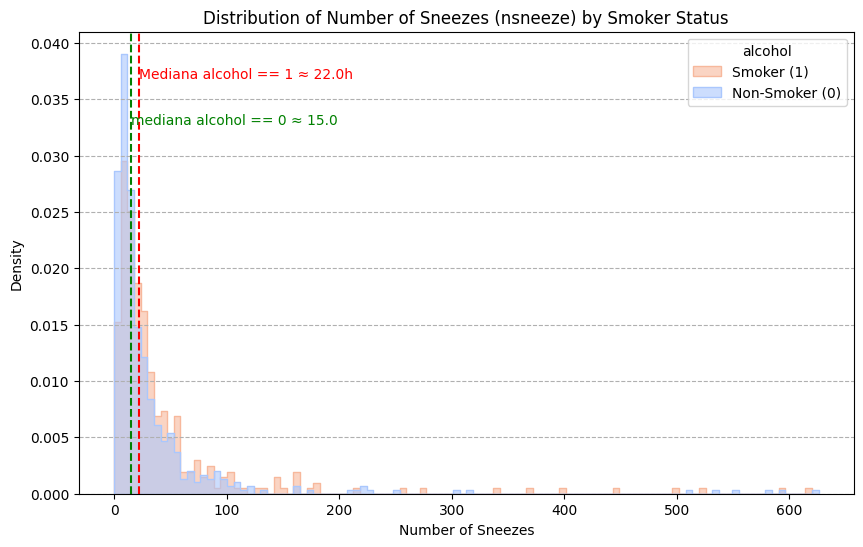

In [200]:

tres_maiores = df['nsneeze'].nlargest(3).index

# 2. Remover essas linhas pelo índice
df_limpo = df.drop(tres_maiores)
binarias= ['smoker','antihist','alcohol']
for item in binarias:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df_limpo, 
        x='nsneeze', 
        hue=item,
        element='step',   
        stat='density',   
        common_norm=False,
        palette='coolwarm',
        alpha=0.6       
    )

    plt.title('Distribution of Number of Sneezes (nsneeze) by Smoker Status')
    plt.xlabel('Number of Sneezes')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--')

    y_max = plt.gca().get_ylim()[1]

    categoria0 = df[df[item]==0]
    categoria1 = df[df[item]==1]

    mediana0= categoria0['nsneeze'].median()
    mediana1= categoria1['nsneeze'].median()

    plt.axvline(x=mediana0,color = 'green', label='Mediana',linestyle = '--')
    plt.text( mediana0, y_max*0.8, f'mediana {item} == 0 ≈ {mediana0:.1f}', color='green')
    plt.axvline(x=mediana1,color = 'red', label='Mediana',linestyle = '--')
    plt.text(mediana1,y_max*0.9, f'Mediana {item} == 1 ≈ {mediana1:.1f}h', color='red')

    plt.legend(title=item, labels=['Smoker (1)', 'Non-Smoker (0)'])

    plt.show()

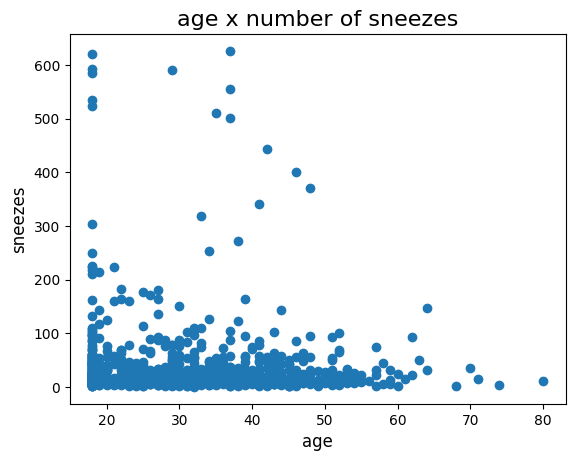

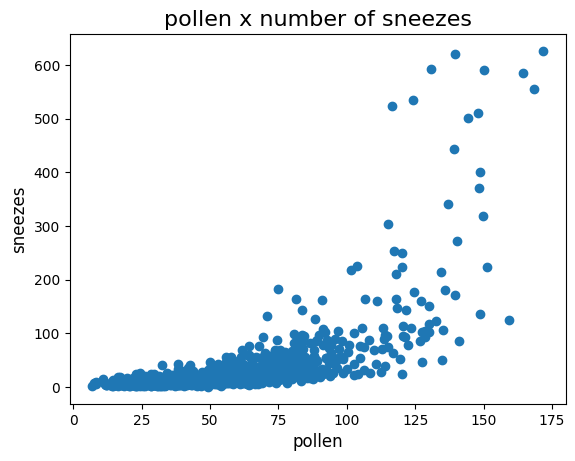

In [201]:
continuas = ['age','pollen']

for item in continuas:
 plt.scatter(df_limpo[item],df_limpo['nsneeze'])
 plt.title("{} x number of sneezes".format(item) , fontsize = 16)
 plt.xlabel(item , fontsize = 12)
 plt.ylabel('sneezes', fontsize = 12)
 plt.show()

In [ ]:
#info dos outliers removidos
print(df.iloc[tres_maiores])

     nsneeze  alcohol  antihist  smoker   age      pollen
578     3179        1         0       1  18.0  187.005676
96      1822        1         0       0  32.0  210.301477
601      725        1         0       0  35.0  161.292515


In [203]:
#informação da distribuição das classes binarias

for item in binarias:
    print(df[item].value_counts())


smoker
0    690
1    160
Name: count, dtype: int64
antihist
0    620
1    230
Name: count, dtype: int64
alcohol
0    503
1    347
Name: count, dtype: int64


Com a análise exploratória, podemos concluir que aparentemente há uma relação especialmente forte entre a quantidade de pólen e o a variável resposta (número de espirros), captada tanto pela correlação de pearson, quanto pela de spearman, esta com mais intensidade.Além disso, vemos que existem outliers claros na variável resposta e que a mediana do número de espirros muda consideravelmente considerando o valor de cada variável binária, o que, junto com a correlação, é um indício de que elas de fato possuem algum efeito sobre a V.R.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [204]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [205]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [206]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5243.5
Date:                Sun, 30 Nov 2025   Deviance:                       6416.9
Time:                        21:24:39   Pearson chi2:                 6.61e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5704      0.021  

In [207]:
print(ajuste_pois.summary2())

                Results: Generalized linear model
Model:                GLM              AIC:            10499.0656
Link Function:        Log              BIC:            723.8816  
Dependent Variable:   nsneeze          Log-Likelihood: -5243.5   
Date:                 2025-11-30 21:24 LL-Null:        -45581.   
No. Observations:     850              Deviance:       6416.9    
Df Model:             5                Pearson chi2:   6.61e+03  
Df Residuals:         844              Scale:          1.0000    
Method:               IRLS                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         1.5704   0.0212  74.1033 0.0000  1.5288  1.6119
C(alcohol)[T.1]   0.3477   0.0107  32.6354 0.0000  0.3268  0.3686
C(antihist)[T.1] -0.5969   0.0147 -40.6780 0.0000 -0.6257 -0.5682
C(smoker)[T.1]    0.6700  

In [208]:
params = ajuste_pois.params
conf = ajuste_pois.conf_int()
conf.columns = ['IC 2.5%', 'IC 97.5%']

irr_df = pd.DataFrame({
    'Coeficiente (Log)': params,
    'IRR (Razão de Taxas)': np.exp(params),
    'IC 2.5% (IRR)': np.exp(conf['IC 2.5%']),
    'IC 97.5% (IRR)': np.exp(conf['IC 97.5%']),
    'P-valor': ajuste_pois.pvalues
})

print(irr_df.round(3))

                  Coeficiente (Log)  IRR (Razão de Taxas)  IC 2.5% (IRR)  \
Intercept                     1.570                 4.808          4.613   
C(alcohol)[T.1]               0.348                 1.416          1.387   
C(antihist)[T.1]             -0.597                 0.551          0.535   
C(smoker)[T.1]                0.670                 1.954          1.911   
age                          -0.013                 0.987          0.986   
pollen                        0.030                 1.031          1.030   

                  IC 97.5% (IRR)  P-valor  
Intercept                  5.012      0.0  
C(alcohol)[T.1]            1.446      0.0  
C(antihist)[T.1]           0.567      0.0  
C(smoker)[T.1]             1.998      0.0  
age                        0.988      0.0  
pollen                     1.031      0.0  


A estimativa dos coeficientes é dada pela coluna "coef", e podemos interpretar sua relevância a partir da razão de taxas, dada pela fórmula $exp(\beta_i)$, conforme calculado acima. Isso significa que um aumento unitário na covariável $x_i$ corresponde a um aumento ou redução de $1-exp(\beta_i)$ na contagem. É válido notar que a razão de taxas não diz que as variáveis binárias são mais significativos que as contínuas, especialmente pólen, porque elas estão em escalas diferentes.  Além disso, todos os coeficientes são significativos para o modelo ao nível de 5 por cento de significância, pois, no teste de Wald, o p-valor de todos os $\beta$ é menor do que 0.05 (todos são aproximadamente 0), segundo o resumo do modelo ajustado. Entretanto, talvez a estatística de Wald esteja inflada artificialmente, em razão de um possível sobredispersão dos dados.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [ ]:
#  Estatística de Dispersão (Phi)
phi = ajuste_pois.pearson_chi2 / ajuste_pois.df_resid
print(phi)



7.83757144448622


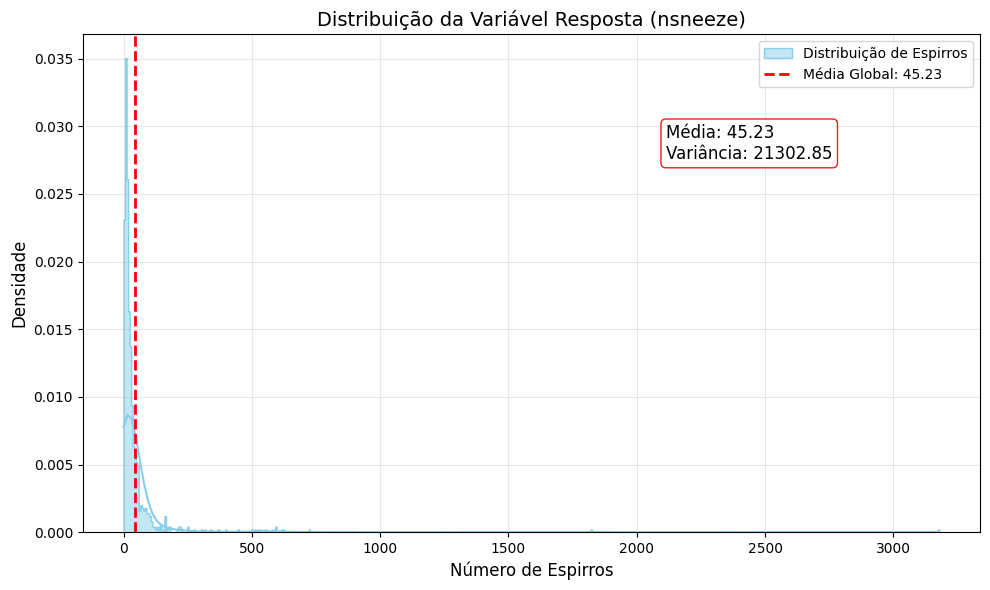

In [ ]:
media = df['nsneeze'].mean()
variancia = df['nsneeze'].var()

plt.figure(figsize=(10, 6))

sns.histplot(df['nsneeze'], kde=True, color='skyblue', element='step', stat='density', label='Distribuição de Espirros')

plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média Global: {media:.2f}')

plt.text(0.65, 0.75, 
         f'Média: {media:.2f}\nVariância: {variancia:.2f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='red', boxstyle='round'))

plt.title('Distribuição da Variável Resposta (nsneeze)', fontsize=14)
plt.xlabel('Número de Espirros', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [228]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

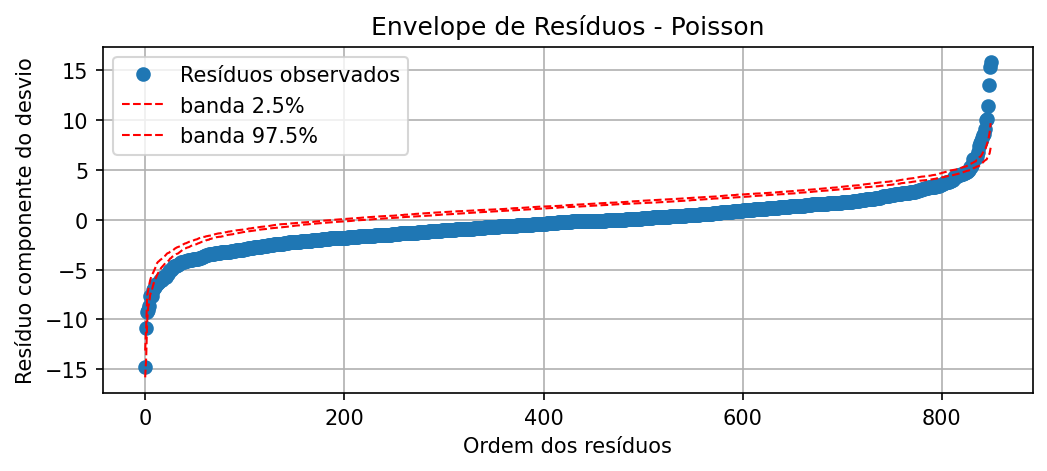

In [229]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

Com uma análise exploatória que plota a distribuição da variável resposta, conclui-se que há uma forte evidência de que a variância populacional é superior a média populacional. Ademais, o gráfico de resíduos mostra que quase todos os resíduos estão fora da banda de confiança, com uma divergência ainda maior nas caldas. Por fim, o último indicativo de sobredispersão é o parâmetro de dispersão calculado, que foi de aproximadamente 7.84, muito maior do que 1, que seria o valor ideal para o ajuste de Poisson.

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [230]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3142.6
Date:                Sun, 30 Nov 2025   Deviance:                       777.09
Time:                        21:34:38   Pearson chi2:                     752.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9985
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4942      0.064  

In [234]:
print(ajuste_nb.summary2())

                Results: Generalized linear model
Model:                GLM              AIC:            6297.1894 
Link Function:        Log              BIC:            -4915.8846
Dependent Variable:   nsneeze          Log-Likelihood: -3142.6   
Date:                 2025-11-30 21:34 LL-Null:        -5905.5   
No. Observations:     850              Deviance:       777.09    
Df Model:             5                Pearson chi2:   752.      
Df Residuals:         844              Scale:          1.0000    
Method:               IRLS                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         1.4942   0.0635  23.5184 0.0000  1.3697  1.6187
C(alcohol)[T.1]   0.3834   0.0355  10.8023 0.0000  0.3138  0.4530
C(antihist)[T.1] -0.5992   0.0407 -14.7309 0.0000 -0.6789 -0.5195
C(smoker)[T.1]    0.5612  

Vemos na saída dos ajustes dos modelos que a função Deviance do modelo Poisson é de  6416.9, enquanto a do modelo bionomial negativo é de  777.09. Já o AIC deu 10499.0656 na Poisson e 6297.1894 na binomial negativa.

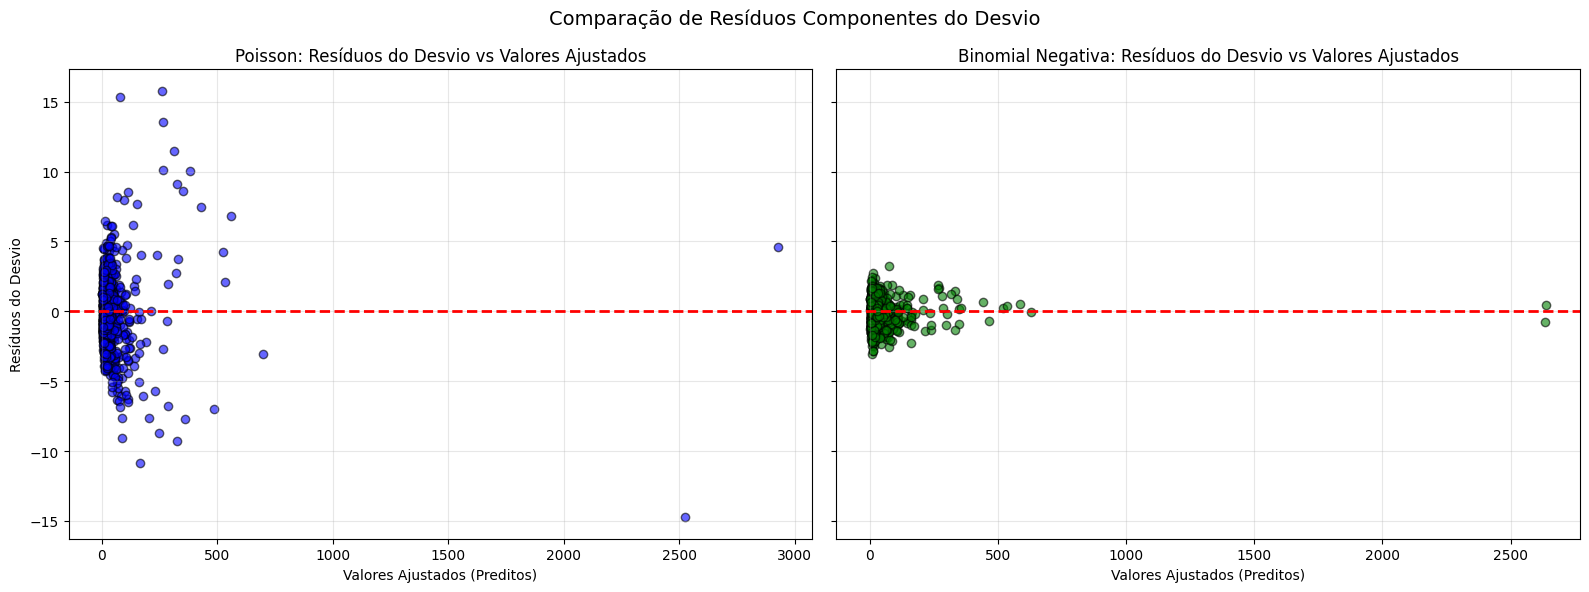

In [ ]:
resid_pois = ajuste_pois.resid_deviance
resid_nb = ajuste_nb.resid_deviance


fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax[0].scatter(ajuste_pois.fittedvalues, resid_pois, alpha=0.6, color='blue', edgecolors='k')
ax[0].axhline(0, color='red', linestyle='--', linewidth=2)
ax[0].set_title('Poisson: Resíduos do Desvio vs Valores Ajustados', fontsize=12)
ax[0].set_xlabel('Valores Ajustados (Preditos)')
ax[0].set_ylabel('Resíduos do Desvio')
ax[0].grid(True, alpha=0.3)

ax[1].scatter(ajuste_nb.fittedvalues, resid_nb, alpha=0.6, color='green', edgecolors='k')
ax[1].axhline(0, color='red', linestyle='--', linewidth=2)
ax[1].set_title('Binomial Negativa: Resíduos do Desvio vs Valores Ajustados', fontsize=12)
ax[1].set_xlabel('Valores Ajustados (Preditos)')
ax[1].grid(True, alpha=0.3)

plt.suptitle("Comparação de Resíduos Componentes do Desvio", fontsize=14)
plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5243.5
Date:                Sun, 30 Nov 2025   Deviance:                       6416.9
Time:                        22:24:26   Pearson chi2:                 6.61e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5704      0.021  

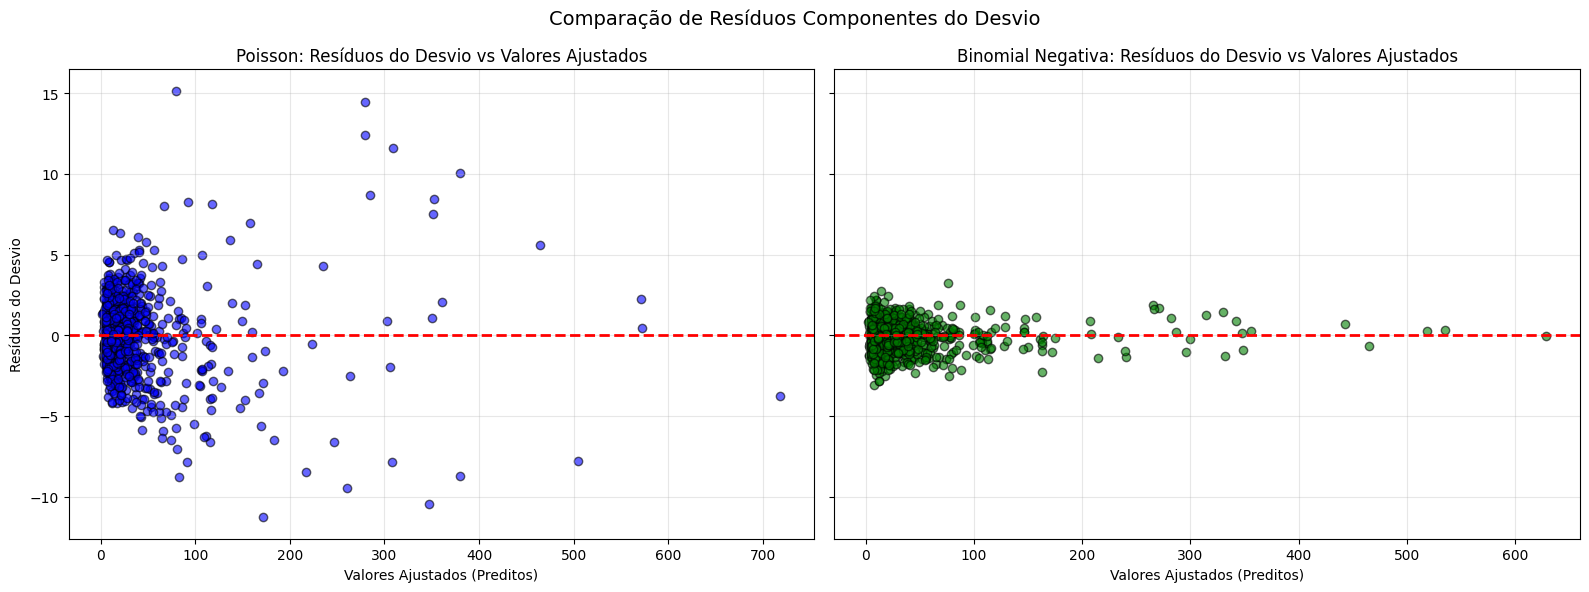

In [238]:
#sem os 3 outliers comentados anteriormente, temos: 

modelo_pois_limpo = smf.glm(
    formula=formula,
    data=df_limpo,
    family=sm.families.Poisson()
)

ajuste_pois_limpo = modelo_pois_limpo.fit()
print(ajuste_pois.summary())


modelo_nb_limpo = smf.glm(
    formula=formula,
    data=df_limpo,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb_limpo = modelo_nb_limpo.fit()

resid_pois_limpo = ajuste_pois_limpo.resid_deviance
resid_nb_limpo = ajuste_nb_limpo.resid_deviance


fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax[0].scatter(ajuste_pois_limpo.fittedvalues, resid_pois_limpo, alpha=0.6, color='blue', edgecolors='k')
ax[0].axhline(0, color='red', linestyle='--', linewidth=2)
ax[0].set_title('Poisson: Resíduos do Desvio vs Valores Ajustados', fontsize=12)
ax[0].set_xlabel('Valores Ajustados (Preditos)')
ax[0].set_ylabel('Resíduos do Desvio')
ax[0].grid(True, alpha=0.3)

ax[1].scatter(ajuste_nb_limpo.fittedvalues, resid_nb_limpo, alpha=0.6, color='green', edgecolors='k')
ax[1].axhline(0, color='red', linestyle='--', linewidth=2)
ax[1].set_title('Binomial Negativa: Resíduos do Desvio vs Valores Ajustados', fontsize=12)
ax[1].set_xlabel('Valores Ajustados (Preditos)')
ax[1].grid(True, alpha=0.3)

plt.suptitle("Comparação de Resíduos Componentes do Desvio", fontsize=14)
plt.tight_layout()
plt.show()

Nota-se, tanto pelas medidas do AIC e da função Deviance, que a binomial negativa é teoricamente melhor para esse conjunto de dados. Além disso,enquanto os resíduos da binomial negativa parecem aleatórios e com baixos valores, o gráfico de resíduos da Poisson possuialtos valores absolutos dos resíduos e aparenta assumir uma forma de leque, o que indica que a suposição de que a média é igual a variância nos dados não está sendo cumprida.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [218]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


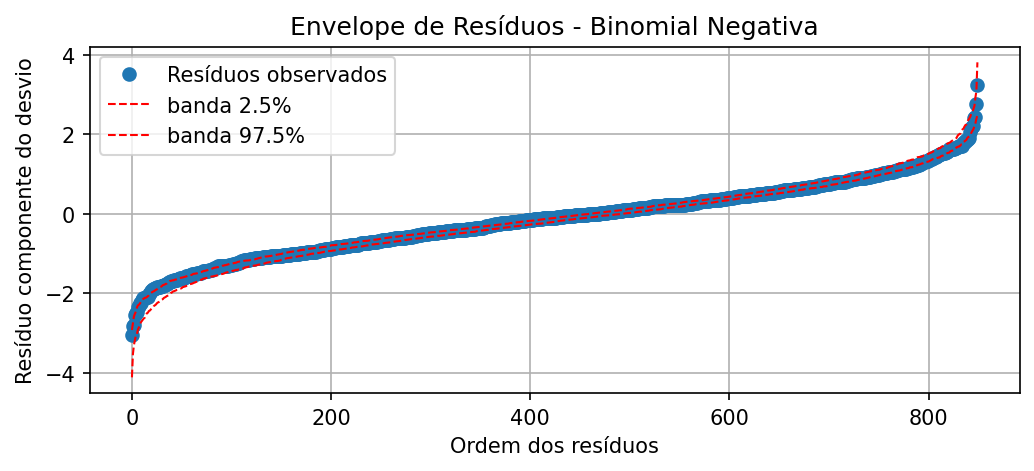

In [219]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [220]:
margeff_nb = ajuste_nb.get_margeff(at='overall', method='dydx')
print(margeff_nb.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     17.0874      1.764      9.684      0.000      13.629      20.546
C(antihist)[T.1]   -26.7061      2.132    -12.525      0.000     -30.885     -22.527
C(smoker)[T.1]      25.0117      2.188     11.429      0.000      20.723      29.301
age                 -0.4507      0.071     -6.379      0.000      -0.589      -0.312
pollen               1.3398      0.065     20.585      0.000       1.212       1.467


Como se tratam de variáveis binárias, o efeito médio marginal configura que a presença de um determinado efeito aumenta em "x" unidades o número médio de espirros, neste caso. Assim , considerando a sobredispersão dos dados e a melhor adequação dos resíduos às bandas de condiança, conclui-se que a bionomial negativa e o melhor modelo. Portanto, temos que o consumo de álcool aumenta em 17.0874 unidades a média do número de espirros, enquanto o uso de anti-histamínicos diminui esta contagem em -26.7061.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [221]:
from sklearn.model_selection import train_test_split

In [222]:
treino,teste= train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


formula = "nsneeze ~ alcohol + antihist + smoker + age + pollen"

modelo_pois_treino = smf.glm(formula=formula, data=treino, family=sm.families.Poisson())
ajuste_pois_treino= modelo_pois_treino.fit()


modelo_nb_treino = smf.glm(formula=formula, data=treino, family=sm.families.NegativeBinomial(alpha = alpha_fixado)) 
ajuste_nb_treino = modelo_nb_treino.fit()

y_pred_pois = ajuste_pois_treino.predict(teste)
y_pred_nb = ajuste_nb_treino.predict(teste)
y_real = teste['nsneeze']

eqm_pois = mean_squared_error(y_real, y_pred_pois)
eam_pois = mean_absolute_error(y_real, y_pred_pois)

eqm_nb = mean_squared_error(y_real, y_pred_nb)
eam_nb = mean_absolute_error(y_real, y_pred_nb)

print(f"Poisson - EQM: {eqm_pois:.4f}, EAM: {eam_pois:.4f}")
print(f"Binomial Neg - EQM: {eqm_nb:.4f}, EAM: {eam_nb:.4f}")

Poisson - EQM: 988.1271, EAM: 11.8963
Binomial Neg - EQM: 1024.4452, EAM: 12.1040


As conclusões não coincidiram. Enquanto os critérios de ajuste e diagnóstico (envelope e estatística $\phi$) apontaram a presença de sobredispersão,a qual sugere a Binomial Negativa como o modelo teoricamente mais adequado para inferência,o EQM e o EAM favoreceram o modelo de Poisson.Isso ocorre porque a Poisson pode fornecer estimativas de média consistentes mesmo na presença de sobredispersão. Portanto, considerando apenas a previsão do número de espirros e a métrica de acurácia, a Poisson foi levemente mellhor que a Binomial Negativa neste conjunto de teste. Porém, para outras análises, como testes de hipótese e p-valores das variáveis, a Binomial Negativa é mais confiável, pois a Poisson subestima os erros padrão e pode gerar falsos positivos. Sendo assim, como a diferença no EQM não foi tão substancial, eu escolhi seguir com o modelo da binomial negativa, considerando os passos feitos até agora.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [225]:
baixo_polen = df['pollen'].quantile(0.2)
alto_polen = df['pollen'].quantile(0.8)
perfis = pd.DataFrame({
    'alcohol':  [0, 1],
    'antihist': [1, 0],
    'smoker':   [0, 1],
    'age':      [30, 50],
    'pollen':   [baixo_polen, alto_polen]
}, index=['Indivíduo A', 'Indivíduo B'])

previsoes = ajuste_nb.predict(perfis)

print("\n--- Previsão do Número Esperado de Espirros ---")
print(previsoes)


--- Previsão do Número Esperado de Espirros ---
Indivíduo A     4.948192
Indivíduo B    79.942938
dtype: float64
